# Investigating C matrices in sub groups

In [65]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
from hyppo.independence import Dcorr
from hyppo.ksample import KSample
from scipy.stats import multiscale_graphcorr
from hyppo.ksample._utils import k_sample_transform
from hyppo.independence.dcorr import _center_distmat
from graspy.plot import heatmap

import sys

sys.path.append("../")
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

<IPython.core.display.Javascript object>

In [3]:
## Define paths, get raw
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag="_gcca")

<IPython.core.display.Javascript object>

In [4]:
labels

[['e', 'restingstate'],
 ['e', 'openmonitoring'],
 ['e', 'compassion'],
 ['n', 'restingstate'],
 ['n', 'openmonitoring'],
 ['n', 'compassion']]

<IPython.core.display.Javascript object>

In [35]:
ways = [[0], [1]]
X, Y = k_sample_transform([np.asarray(groups[i]) for i in [1, 2]], ways=ways)
X = X[:, :, :3].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [55]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="euclidean")

<IPython.core.display.Javascript object>

In [61]:
dc_stat, dc_pvalue, c_mat = Dcorr(compute_distance=None).test(
    X_dists, Y_dists, workers=-1, reps=1000, c_mat=True
)
print(f"pvalue: {dc_pvalue}")

pvalue: 0.998


<IPython.core.display.Javascript object>

In [52]:
stat, pvalue = KSample("Dcorr").test(
    np.reshape(groups[1], (len(groups[1]), -1)),
    np.reshape(groups[2], (len(groups[2]), -1)),
    reps=100,
)
print(pvalue)

1.0


<IPython.core.display.Javascript object>

In [62]:
y = np.repeat([labels[i] for i in [1, 2]], [len(groups[i]) for i in [1, 2]], axis=0)
label_dict = {"e": "Expert", "n": "Novice"}
y_labels = [f"{a}, {b}" for a, b in y]

<IPython.core.display.Javascript object>

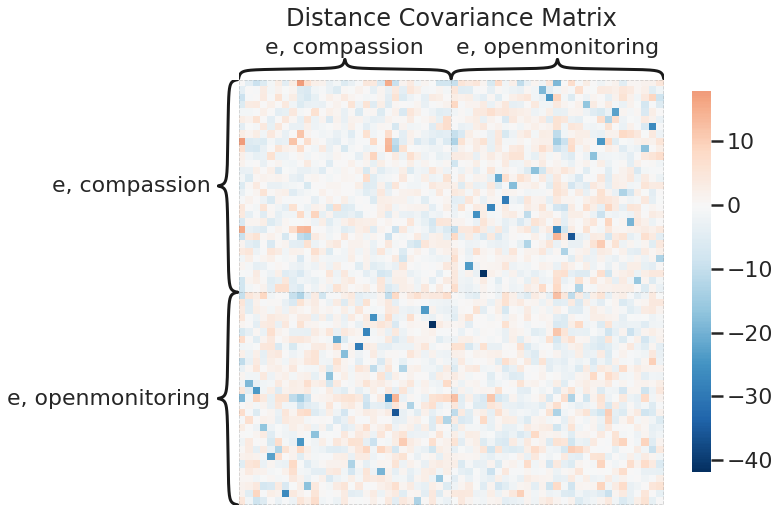

<IPython.core.display.Javascript object>

In [63]:
fig = heatmap(
    c_mat,
    title=f"Distance Covariance Matrix",
    transform=None,
    inner_hier_labels=y_labels,
    context="poster",
    hier_label_fontsize=22,
)

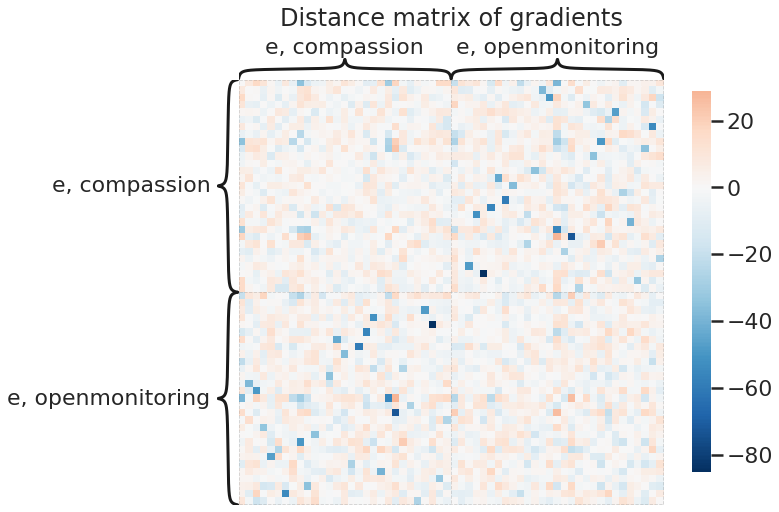

<IPython.core.display.Javascript object>

In [66]:
fig = heatmap(
    _center_distmat(X_dists, bias=False),
    title=f"Distance matrix of gradients",
    transform=None,
    inner_hier_labels=y_labels,
    context="poster",
    hier_label_fontsize=22,
)

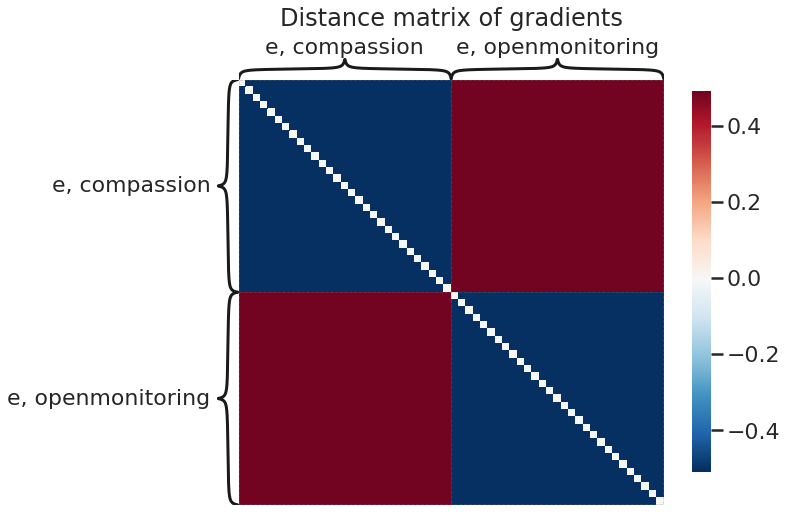

<IPython.core.display.Javascript object>

In [67]:
fig = heatmap(
    _center_distmat(Y_dists, bias=False),
    title=f"Distance matrix of gradients",
    transform=None,
    inner_hier_labels=y_labels,
    context="poster",
    hier_label_fontsize=22,
)